In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('clean_rainfall_dataframe.csv')
data.head()

,Year,Station,Month,Day,Rainfall,AvgHumidity,AvgTemp,StationIndex,class
0,1970,Barisal,1,1,0,78,16.2,2,0
1,1970,Barisal,1,2,0,78,16.3,2,0
2,1970,Barisal,1,3,0,81,16.4,2,0
3,1970,Barisal,1,4,0,79,16.9,2,0
4,1970,Barisal,1,5,0,80,17.2,2,0


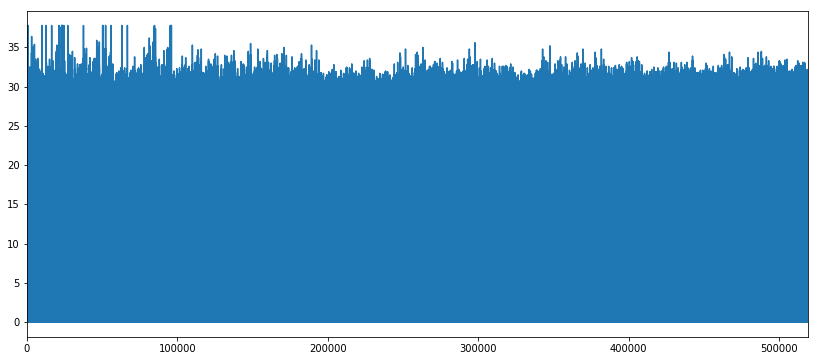

In [2]:
plt.figure(figsize=(14,6))
data['AvgTemp'].plot()

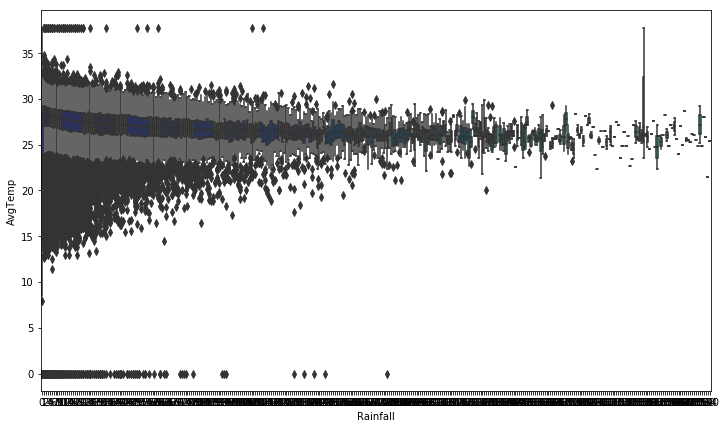

In [3]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Rainfall',y='AvgTemp',data=data,palette='winter')

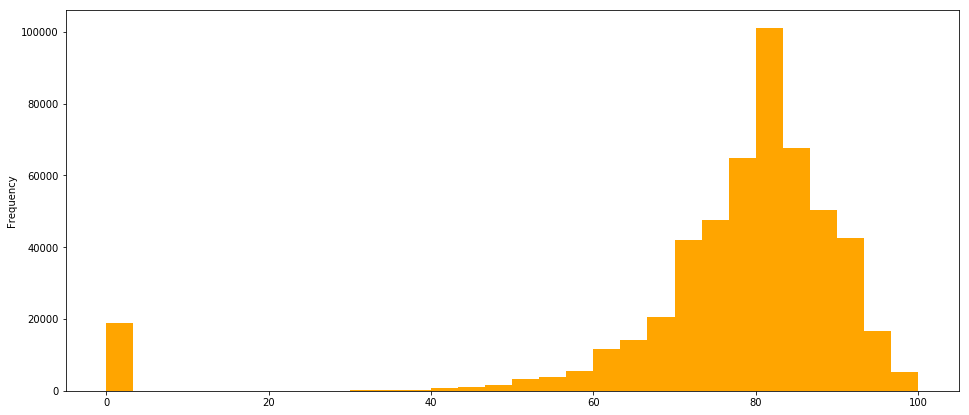

In [4]:
data['AvgHumidity'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))


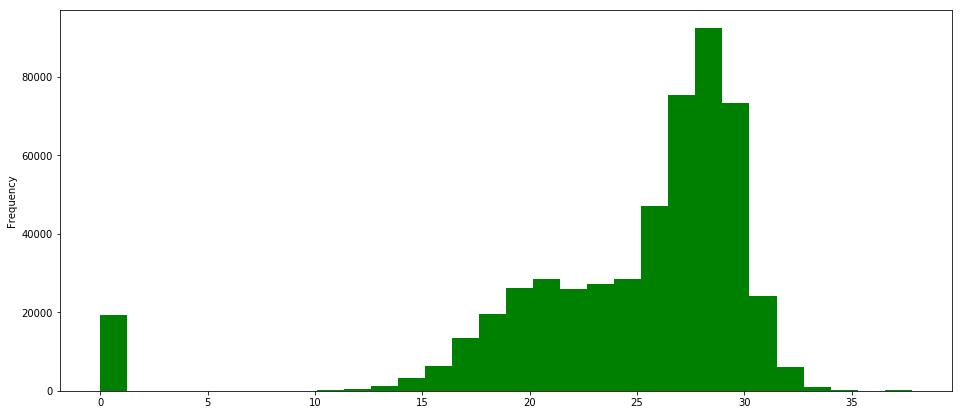

In [5]:
data['AvgTemp'].plot(kind='hist',bins=30,color='green',figsize= (16,7))

In [6]:
data = data.drop(['Station'], axis=1)
data.head()

,Year,Month,Day,Rainfall,AvgHumidity,AvgTemp,StationIndex,class
0,1970,1,1,0,78,16.2,2,0
1,1970,1,2,0,78,16.3,2,0
2,1970,1,3,0,81,16.4,2,0
3,1970,1,4,0,79,16.9,2,0
4,1970,1,5,0,80,17.2,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519405 entries, 0 to 519404
Data columns (total 8 columns):
Year            519405 non-null int64
Month           519405 non-null int64
Day             519405 non-null int64
Rainfall        519405 non-null int64
AvgHumidity     519405 non-null int64
AvgTemp         519405 non-null float64
StationIndex    519405 non-null int64
class           519405 non-null int64
dtypes: float64(1), int64(7)
memory usage: 31.7 MB


In [8]:
data.dropna(inplace=True)

In [9]:
X = data.drop(['class'], axis=1)
y = data['class']

X.head()

,Year,Month,Day,Rainfall,AvgHumidity,AvgTemp,StationIndex
0,1970,1,1,0,78,16.2,2
1,1970,1,2,0,78,16.3,2
2,1970,1,3,0,81,16.4,2
3,1970,1,4,0,79,16.9,2
4,1970,1,5,0,80,17.2,2


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=41)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
import keras 
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [14]:
ann  = Sequential()
ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=7))
ann.add(Dense(units= 16,init= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
sgd = SGD(lr=0.1, momentum=0.8)
ann.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['accuracy'])

W0309 12:17:18.260235 140077174511424 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  
W0309 12:17:18.286053 140077174511424 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0309 12:17:18.288703 140077174511424 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/ho

In [15]:
ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0309 12:17:29.088322 140077174511424 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0309 12:17:29.103389 140077174511424 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
415524/415524 [==============================] - 79s 190us/step - loss: 0.0107 - acc: 0.9859
Epoch 2/10
415524/415524 [==============================] - 78s 187us/step - loss: 4.3621e-04 - acc: 0.9995
Epoch 3/10
415524/415524 [==============================] - 77s 185us/step - loss: 8.1096e-04 - acc: 0.9990
Epoch 4/10
415524/415524 [==============================] - 76s 184us/step - loss: 3.0072e-04 - acc: 0.9996
Epoch 5/10
415524/415524 [==============================] - 75s 180us/step - loss: 3.6819e-05 - acc: 1.0000
Epoch 6/10
415524/415524 [==============================] - 76s 184us/step - loss: 3.1676e-04 - acc: 0.9996
Epoch 7/10
415524/415524 [==============================] - 78s 187us/step - loss: 2.4172e-04 - acc: 0.9997
Epoch 8/10
415524/415524 [==============================] - 76s 184us/step - loss: 3.1454e-04 - acc: 0.9996
Epoch 9/10
415524/415524 [==============================] - 77s 185us/step - loss: 5.3772e-04 - acc: 0.9994
Epoch 10/10
415524/415524 [=====

In [16]:
Y_pred = ann.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Y_pred)
print(cm)

[[71784     0]
 [    9 32088]]


In [15]:
ann  = Sequential()
ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=7))
ann.add(Dense(units= 16,init= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
sgd = SGD(lr=0.1, momentum=0.8)
ann.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0314 11:24:37.445374 140054624474944 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  
W0314 11:24:37.481260 140054624474944 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0314 11:24:37.483722 140054624474944 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/ho

In [16]:
ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0314 11:24:40.440227 140054624474944 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
415524/415524 [==============================] - 95s 228us/step - loss: 0.0213 - acc: 0.9929
Epoch 2/10
415524/415524 [==============================] - 91s 220us/step - loss: 0.0021 - acc: 0.9994
Epoch 3/10
415524/415524 [==============================] - 90s 218us/step - loss: 0.0020 - acc: 0.9994
Epoch 4/10
415524/415524 [==============================] - 92s 221us/step - loss: 3.1186e-04 - acc: 0.9999
Epoch 5/10
415524/415524 [==============================] - 92s 222us/step - loss: 3.2068e-05 - acc: 1.0000
Epoch 6/10
415524/415524 [==============================] - 91s 218us/step - loss: 2.5058e-05 - acc: 1.0000
Epoch 7/10
415524/415524 [==============================] - 88s 211us/step - loss: 0.0019 - acc: 0.9995
Epoch 8/10
415524/415524 [==============================] - 91s 219us/step - loss: 7.9146e-04 - acc: 0.9998
Epoch 9/10
415524/415524 [==============================] - 89s 215us/step - loss: 0.0015 - acc: 0.9997
Epoch 10/10
415524/415524 [=====================

In [17]:
Y_pred = ann.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Y_pred)
print(cm)

[[71784     0]
 [   13 32084]]


In [30]:
from keras.layers import Dropout
def create_model():
    ann  = Sequential()
    ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=7))
    ann.add(Dropout(0.2))
    ann.add(Dense(units= 16,init= 'uniform', activation = 'relu'))
    ann.add(Dropout(0.2))
    ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
    
    sgd = SGD(lr=0.1, momentum=0.8)
    ann.compile(optimizer=sgd,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    #ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)
    
    return ann

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [31]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=10, batch_size=100, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415523/415523 [==============================] - 12s 28us/step - loss: 0.0584 - acc: 0.9767
Epoch 2/10
415523/415523 [==============================] - 12s 28us/step - loss: 0.0056 - acc: 0.9985
Epoch 3/10
415523/415523 [==============================] - 11s 26us/step - loss: 0.0041 - acc: 0.9988
Epoch 4/10
415523/415523 [==============================] - 11s 26us/step - loss: 0.0021 - acc: 0.9995
Epoch 5/10
415523/415523 [==============================] - 11s 26us/step - loss: 0.0022 - acc: 0.9994
Epoch 6/10
415523/415523 [==============================] - 11s 26us/step - loss: 0.0020 - acc: 0.9995
Epoch 7/10
415523/415523 [==============================] - 11s 26us/step - loss: 0.0015 - acc: 0.9996
Epoch 8/10
415523/415523 [==============================] - 11s 26us/step - loss: 4.9238e-04 - acc: 0.9999
Epoch 9/10
415523/415523 [==============================] - 11s 26us/step - loss: 0.0011 - acc: 0.9997
Epoch 10/10
 12300/103882 [==>...........................] - ETA: 1s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103882/103882 [==============================] - 1s 10us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0541 - acc: 0.9796
Epoch 2/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0083 - acc: 0.9976
Epoch 3/10
415524/415524 [==============================] - 11s 26us/step - loss: 0.0054 - acc: 0.9984
Epoch 4/10
415524/415524 [==============================] - 11s 26us/step - loss: 0.0050 - acc: 0.9987
Epoch 5/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0036 - acc: 0.9990
Epoch 6/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0024 - acc: 0.9994
Epoch 7/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0014 - acc: 0.9996
Epoch 8/10
415524/415524 [==============================] - 11s 27us/step - loss: 8.4569e-04 - acc: 0.9998
Epoch 9/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0020 - acc: 0.9995
Epoch 10/10
 13000/103881 [==>...........................] - ETA: 1s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 1s 10us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 12s 28us/step - loss: 0.0541 - acc: 0.9792
Epoch 2/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0048 - acc: 0.9988
Epoch 3/10
415524/415524 [==============================] - 11s 28us/step - loss: 0.0035 - acc: 0.9991
Epoch 4/10
415524/415524 [==============================] - 11s 27us/step - loss: 6.6865e-04 - acc: 0.9999
Epoch 5/10
415524/415524 [==============================] - 12s 28us/step - loss: 0.0022 - acc: 0.9994
Epoch 6/10
415524/415524 [==============================] - 11s 28us/step - loss: 0.0017 - acc: 0.9996
Epoch 7/10
415524/415524 [==============================] - 11s 28us/step - loss: 0.0024 - acc: 0.9994
Epoch 8/10
415524/415524 [==============================] - 13s 31us/step - loss: 0.0021 - acc: 0.9995
Epoch 9/10
415524/415524 [==============================] - 12s 28us/step - loss: 0.0016 - acc: 0.9996
Epoch 10/10
  6100/103881 [>.............................] - ETA: 2s 

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 1s 11us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 12s 30us/step - loss: 0.0548 - acc: 0.9795
Epoch 2/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0063 - acc: 0.9984
Epoch 3/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0041 - acc: 0.9990
Epoch 4/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0032 - acc: 0.9992
Epoch 5/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0018 - acc: 0.9996
Epoch 6/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0026 - acc: 0.9993
Epoch 7/10
415524/415524 [==============================] - 11s 26us/step - loss: 0.0016 - acc: 0.9996
Epoch 8/10
415524/415524 [==============================] - 11s 27us/step - loss: 0.0017 - acc: 0.9995
Epoch 9/10
415524/415524 [==============================] - 11s 26us/step - loss: 0.0013 - acc: 0.9997
Epoch 10/10
  6700/103881 [>.............................] - ETA: 2s  

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 1s 11us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415525/415525 [==============================] - 12s 28us/step - loss: 0.0565 - acc: 0.9784
Epoch 2/10
415525/415525 [==============================] - 11s 27us/step - loss: 0.0071 - acc: 0.9982
Epoch 3/10
415525/415525 [==============================] - 11s 26us/step - loss: 0.0040 - acc: 0.9990
Epoch 4/10
415525/415525 [==============================] - 11s 27us/step - loss: 0.0020 - acc: 0.9995
Epoch 5/10
415525/415525 [==============================] - 11s 28us/step - loss: 0.0029 - acc: 0.9994
Epoch 6/10
415525/415525 [==============================] - 11s 28us/step - loss: 0.0016 - acc: 0.9996
Epoch 7/10
415525/415525 [==============================] - 11s 27us/step - loss: 0.0016 - acc: 0.9996
Epoch 8/10
415525/415525 [==============================] - 11s 26us/step - loss: 0.0010 - acc: 0.9997
Epoch 9/10
415525/415525 [==============================] - 11s 26us/step - loss: 0.0012 - acc: 0.9997
Epoch 10/10
  7200/103880 [=>............................] - ETA: 2s  

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103880/103880 [==============================] - 1s 10us/step
Baseline: 99.99% (0.00%)


In [32]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415523/415523 [==============================] - 112s 269us/step - loss: 0.0412 - acc: 0.9860
Epoch 2/10
415523/415523 [==============================] - 106s 256us/step - loss: 0.0126 - acc: 0.9964
Epoch 3/10
415523/415523 [==============================] - 107s 257us/step - loss: 0.0050 - acc: 0.9986
Epoch 4/10
415523/415523 [==============================] - 107s 256us/step - loss: 0.0036 - acc: 0.9990
Epoch 5/10
415523/415523 [==============================] - 106s 254us/step - loss: 0.0032 - acc: 0.9991
Epoch 6/10
415523/415523 [==============================] - 109s 262us/step - loss: 0.0021 - acc: 0.9995
Epoch 7/10
415523/415523 [==============================] - 108s 260us/step - loss: 0.0016 - acc: 0.9996
Epoch 8/10
415523/415523 [==============================] - 107s 258us/step - loss: 0.0021 - acc: 0.9995
Epoch 9/10
415523/415523 [==============================] - 108s 259us/step - loss: 0.0016 - acc: 0.9997
Epoch 10/10
    10/103882 [............................

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103882/103882 [==============================] - 10s 96us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 111s 268us/step - loss: 0.0455 - acc: 0.9848
Epoch 2/10
415524/415524 [==============================] - 109s 263us/step - loss: 0.0164 - acc: 0.9950
Epoch 3/10
415524/415524 [==============================] - 108s 259us/step - loss: 0.0102 - acc: 0.9971
Epoch 4/10
415524/415524 [==============================] - 107s 258us/step - loss: 0.0059 - acc: 0.9984
Epoch 5/10
415524/415524 [==============================] - 107s 258us/step - loss: 0.0048 - acc: 0.9987
Epoch 6/10
415524/415524 [==============================] - 108s 261us/step - loss: 0.0051 - acc: 0.9986
Epoch 7/10
415524/415524 [==============================] - 109s 263us/step - loss: 0.0025 - acc: 0.9993
Epoch 8/10
415524/415524 [==============================] - 110s 264us/step - loss: 0.0038 - acc: 0.9990
Epoch 9/10
415524/415524 [==============================] - 110s 264us/step - loss: 0.0035 - acc: 0.9991
Epoch 10/10
    10/103881 [............................

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 10s 99us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 112s 269us/step - loss: 0.0405 - acc: 0.9863
Epoch 2/10
415524/415524 [==============================] - 111s 266us/step - loss: 0.0103 - acc: 0.9968
Epoch 3/10
415524/415524 [==============================] - 111s 267us/step - loss: 0.0048 - acc: 0.9987
Epoch 4/10
415524/415524 [==============================] - 112s 269us/step - loss: 0.0019 - acc: 0.9994
Epoch 5/10
415524/415524 [==============================] - 111s 266us/step - loss: 0.0014 - acc: 0.9996
Epoch 6/10
415524/415524 [==============================] - 109s 261us/step - loss: 0.0060 - acc: 0.9982
Epoch 7/10
415524/415524 [==============================] - 108s 260us/step - loss: 0.0028 - acc: 0.9993
Epoch 8/10
415524/415524 [==============================] - 109s 262us/step - loss: 0.0026 - acc: 0.9993
Epoch 9/10
415524/415524 [==============================] - 109s 262us/step - loss: 0.0022 - acc: 0.9994
Epoch 10/10
415524/415524 [============================

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 10s 101us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 113s 273us/step - loss: 0.0395 - acc: 0.9866
Epoch 2/10
415524/415524 [==============================] - 113s 271us/step - loss: 0.0097 - acc: 0.9972
Epoch 3/10
415524/415524 [==============================] - 119s 285us/step - loss: 0.0081 - acc: 0.9976
Epoch 4/10
415524/415524 [==============================] - 112s 269us/step - loss: 0.0103 - acc: 0.9969
Epoch 5/10
415524/415524 [==============================] - 110s 265us/step - loss: 0.0037 - acc: 0.9990
Epoch 6/10
415524/415524 [==============================] - 109s 261us/step - loss: 0.0064 - acc: 0.9982
Epoch 7/10
415524/415524 [==============================] - 106s 255us/step - loss: 0.3629 - acc: 0.8965
Epoch 8/10
415524/415524 [==============================] - 105s 252us/step - loss: 0.4569 - acc: 0.8309
Epoch 9/10
415524/415524 [==============================] - 107s 258us/step - loss: 0.4529 - acc: 0.8183
Epoch 10/10
415524/415524 [============================

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 11s 102us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415525/415525 [==============================] - 109s 263us/step - loss: 0.0391 - acc: 0.9866
Epoch 2/10
415525/415525 [==============================] - 109s 263us/step - loss: 0.0077 - acc: 0.9978
Epoch 3/10
415525/415525 [==============================] - 107s 257us/step - loss: 0.0046 - acc: 0.9986
Epoch 4/10
415525/415525 [==============================] - 105s 252us/step - loss: 0.0021 - acc: 0.9994
Epoch 5/10
415525/415525 [==============================] - 107s 257us/step - loss: 0.0030 - acc: 0.9991
Epoch 6/10
415525/415525 [==============================] - 106s 255us/step - loss: 0.3434 - acc: 0.8947
Epoch 7/10
415525/415525 [==============================] - 109s 262us/step - loss: 2.6373 - acc: 0.7179
Epoch 8/10
415525/415525 [==============================] - 105s 253us/step - loss: 2.0993 - acc: 0.6594
Epoch 9/10
415525/415525 [==============================] - 104s 251us/step - loss: 0.6260 - acc: 0.6916
Epoch 10/10
415525/415525 [============================

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103880/103880 [==============================] - 12s 119us/step
Baseline: 91.07% (12.17%)


In [16]:
from keras.layers import Dropout
def create_model():
    ann  = Sequential()
    ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=7))
    ann.add(Dropout(0.2))
    ann.add(Dense(units= 16,init= 'uniform', activation = 'relu'))
    ann.add(Dropout(0.2))
    ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
    
    #sgd = SGD(lr=0.1, momentum=0.8)
    ann.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    #ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)
    
    return ann

In [14]:
ann = create_model()
ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)

W0314 18:07:53.434021 139905727534912 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
W0314 18:07:53.460353 139905727534912 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0314 18:07:53.462597 139905727534912 deprecation_wrapper.py:119] From /home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Pleas

Epoch 1/10
415524/415524 [==============================] - 118s 283us/step - loss: 0.0048 - acc: 0.9942
Epoch 2/10
415524/415524 [==============================] - 115s 277us/step - loss: 0.0011 - acc: 0.9988
Epoch 3/10
415524/415524 [==============================] - 118s 284us/step - loss: 8.3516e-04 - acc: 0.9990
Epoch 4/10
415524/415524 [==============================] - 114s 274us/step - loss: 6.6413e-04 - acc: 0.9992
Epoch 5/10
415524/415524 [==============================] - 116s 279us/step - loss: 6.4763e-04 - acc: 0.9992
Epoch 6/10
415524/415524 [==============================] - 118s 284us/step - loss: 6.5887e-04 - acc: 0.9992
Epoch 7/10
415524/415524 [==============================] - 114s 274us/step - loss: 5.1677e-04 - acc: 0.9994
Epoch 8/10
415524/415524 [==============================] - 113s 271us/step - loss: 5.0233e-04 - acc: 0.9994
Epoch 9/10
415524/415524 [==============================] - 110s 264us/step - loss: 4.7554e-04 - acc: 0.9994
Epoch 10/10
415524/415524 [

In [17]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=10, batch_size=100, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415523/415523 [==============================] - 14s 34us/step - loss: 0.0192 - acc: 0.9784
Epoch 2/10
415523/415523 [==============================] - 13s 32us/step - loss: 2.7705e-04 - acc: 0.9998
Epoch 3/10
415523/415523 [==============================] - 13s 31us/step - loss: 1.4628e-04 - acc: 0.9999
Epoch 4/10
415523/415523 [==============================] - 12s 30us/step - loss: 1.6669e-04 - acc: 0.9998
Epoch 5/10
415523/415523 [==============================] - 13s 31us/step - loss: 1.8444e-04 - acc: 0.9998
Epoch 6/10
415523/415523 [==============================] - 12s 30us/step - loss: 2.1912e-04 - acc: 0.9997
Epoch 7/10
415523/415523 [==============================] - 13s 31us/step - loss: 1.6323e-04 - acc: 0.9998
Epoch 8/10
415523/415523 [==============================] - 14s 34us/step - loss: 1.6424e-04 - acc: 0.9998
Epoch 9/10
415523/415523 [==============================] - 14s 34us/step - loss: 2.0734e-04 - acc: 0.9998
Epoch 10/10
 13200/103882 [==>...........

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103882/103882 [==============================] - 1s 9us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 14s 35us/step - loss: 0.0186 - acc: 0.9787
Epoch 2/10
415524/415524 [==============================] - 14s 33us/step - loss: 2.7209e-04 - acc: 0.9998
Epoch 3/10
415524/415524 [==============================] - 14s 34us/step - loss: 1.7323e-04 - acc: 0.9999
Epoch 4/10
415524/415524 [==============================] - 12s 30us/step - loss: 2.1025e-04 - acc: 0.9998
Epoch 5/10
415524/415524 [==============================] - 14s 34us/step - loss: 1.7862e-04 - acc: 0.9998
Epoch 6/10
415524/415524 [==============================] - 15s 35us/step - loss: 2.0918e-04 - acc: 0.9998
Epoch 7/10
415524/415524 [==============================] - 12s 29us/step - loss: 1.6467e-04 - acc: 0.9998
Epoch 8/10
415524/415524 [==============================] - 12s 29us/step - loss: 1.7448e-04 - acc: 0.9998
Epoch 9/10
415524/415524 [==============================] - 13s 32us/step - loss: 1.9261e-04 - acc: 0.9998
Epoch 10/10
 14900/103881 [===>..........

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 1s 8us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 12s 29us/step - loss: 0.0187 - acc: 0.9784
Epoch 2/10
415524/415524 [==============================] - 12s 28us/step - loss: 2.4322e-04 - acc: 0.9998
Epoch 3/10
415524/415524 [==============================] - 13s 30us/step - loss: 1.7761e-04 - acc: 0.9998
Epoch 4/10
415524/415524 [==============================] - 13s 32us/step - loss: 2.0039e-04 - acc: 0.9998
Epoch 5/10
415524/415524 [==============================] - 13s 32us/step - loss: 1.6240e-04 - acc: 0.9998
Epoch 6/10
415524/415524 [==============================] - 12s 29us/step - loss: 1.7045e-04 - acc: 0.9998
Epoch 7/10
415524/415524 [==============================] - 13s 31us/step - loss: 1.5540e-04 - acc: 0.9998
Epoch 8/10
415524/415524 [==============================] - 12s 29us/step - loss: 1.6316e-04 - acc: 0.9998
Epoch 9/10
415524/415524 [==============================] - 13s 31us/step - loss: 1.5772e-04 - acc: 0.9998
Epoch 10/10
 16100/103881 [===>..........

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 1s 9us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 12s 30us/step - loss: 0.0196 - acc: 0.9768
Epoch 2/10
415524/415524 [==============================] - 13s 30us/step - loss: 1.9785e-04 - acc: 0.9999
Epoch 3/10
415524/415524 [==============================] - 13s 32us/step - loss: 1.9028e-04 - acc: 0.9998
Epoch 4/10
415524/415524 [==============================] - 14s 33us/step - loss: 1.6015e-04 - acc: 0.9998
Epoch 5/10
415524/415524 [==============================] - 13s 30us/step - loss: 1.5826e-04 - acc: 0.9998
Epoch 6/10
415524/415524 [==============================] - 14s 34us/step - loss: 1.4930e-04 - acc: 0.9998
Epoch 7/10
415524/415524 [==============================] - 15s 36us/step - loss: 1.9106e-04 - acc: 0.9998
Epoch 8/10
415524/415524 [==============================] - 12s 29us/step - loss: 1.4941e-04 - acc: 0.9998
Epoch 9/10
415524/415524 [==============================] - 12s 28us/step - loss: 2.1848e-04 - acc: 0.9997
Epoch 10/10
  8400/103881 [=>............

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 1s 9us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415525/415525 [==============================] - 15s 35us/step - loss: 0.0185 - acc: 0.9794
Epoch 2/10
415525/415525 [==============================] - 15s 37us/step - loss: 2.4733e-04 - acc: 0.9998
Epoch 3/10
415525/415525 [==============================] - 14s 34us/step - loss: 2.0180e-04 - acc: 0.9998
Epoch 4/10
415525/415525 [==============================] - 13s 32us/step - loss: 1.7341e-04 - acc: 0.9998
Epoch 5/10
415525/415525 [==============================] - 12s 29us/step - loss: 1.3438e-04 - acc: 0.9999
Epoch 6/10
415525/415525 [==============================] - 12s 28us/step - loss: 1.7319e-04 - acc: 0.9998
Epoch 7/10
415525/415525 [==============================] - 14s 33us/step - loss: 1.5194e-04 - acc: 0.9998
Epoch 8/10
415525/415525 [==============================] - 13s 30us/step - loss: 1.9472e-04 - acc: 0.9998
Epoch 9/10
415525/415525 [==============================] - 13s 30us/step - loss: 1.9017e-04 - acc: 0.9998
Epoch 10/10
  8200/103880 [=>............

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103880/103880 [==============================] - 1s 9us/step
Baseline: 99.99% (0.01%)


In [18]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415523/415523 [==============================] - 121s 291us/step - loss: 0.0046 - acc: 0.9947
Epoch 2/10
415523/415523 [==============================] - 119s 285us/step - loss: 0.0010 - acc: 0.9988
Epoch 3/10
415523/415523 [==============================] - 122s 293us/step - loss: 8.3683e-04 - acc: 0.9990
Epoch 4/10
415523/415523 [==============================] - 114s 273us/step - loss: 6.8432e-04 - acc: 0.9992
Epoch 5/10
415523/415523 [==============================] - 117s 282us/step - loss: 6.6012e-04 - acc: 0.9992
Epoch 6/10
415523/415523 [==============================] - 116s 279us/step - loss: 4.9865e-04 - acc: 0.9994
Epoch 7/10
415523/415523 [==============================] - 112s 270us/step - loss: 4.5305e-04 - acc: 0.9995
Epoch 8/10
415523/415523 [==============================] - 114s 275us/step - loss: 5.4405e-04 - acc: 0.9994
Epoch 9/10
415523/415523 [==============================] - 113s 272us/step - loss: 5.2762e-04 - acc: 0.9994
Epoch 10/10
   820/103882 [

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103882/103882 [==============================] - 8s 79us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 123s 297us/step - loss: 0.0047 - acc: 0.9946
Epoch 2/10
415524/415524 [==============================] - 121s 292us/step - loss: 0.0011 - acc: 0.9987
Epoch 3/10
415524/415524 [==============================] - 119s 286us/step - loss: 8.9542e-04 - acc: 0.9990
Epoch 4/10
415524/415524 [==============================] - 119s 286us/step - loss: 8.2976e-04 - acc: 0.9990
Epoch 5/10
415524/415524 [==============================] - 121s 290us/step - loss: 7.0853e-04 - acc: 0.9992
Epoch 6/10
415524/415524 [==============================] - 119s 286us/step - loss: 5.9530e-04 - acc: 0.9993
Epoch 7/10
415524/415524 [==============================] - 115s 278us/step - loss: 5.2536e-04 - acc: 0.9994
Epoch 8/10
415524/415524 [==============================] - 122s 294us/step - loss: 5.1707e-04 - acc: 0.9994
Epoch 9/10
415524/415524 [==============================] - 121s 291us/step - loss: 5.3804e-04 - acc: 0.9994
Epoch 10/10
    10/103881 [

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 9s 90us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 129s 312us/step - loss: 0.0052 - acc: 0.9941
Epoch 2/10
415524/415524 [==============================] - 123s 297us/step - loss: 0.0010 - acc: 0.9988
Epoch 3/10
415524/415524 [==============================] - 121s 292us/step - loss: 8.3741e-04 - acc: 0.9990
Epoch 4/10
415524/415524 [==============================] - 123s 296us/step - loss: 8.5224e-04 - acc: 0.9990
Epoch 5/10
415524/415524 [==============================] - 121s 291us/step - loss: 6.7083e-04 - acc: 0.9992
Epoch 6/10
415524/415524 [==============================] - 122s 294us/step - loss: 6.3375e-04 - acc: 0.9993
Epoch 7/10
415524/415524 [==============================] - 123s 296us/step - loss: 5.6924e-04 - acc: 0.9993
Epoch 8/10
415524/415524 [==============================] - 121s 291us/step - loss: 4.5350e-04 - acc: 0.9995
Epoch 9/10
415524/415524 [==============================] - 121s 291us/step - loss: 4.1886e-04 - acc: 0.9995
Epoch 10/10
    10/103881 [

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 9s 90us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415524/415524 [==============================] - 123s 296us/step - loss: 0.0050 - acc: 0.9941
Epoch 2/10
415524/415524 [==============================] - 121s 291us/step - loss: 0.0011 - acc: 0.9987
Epoch 3/10
415524/415524 [==============================] - 125s 300us/step - loss: 9.3036e-04 - acc: 0.9989
Epoch 4/10
415524/415524 [==============================] - 123s 295us/step - loss: 7.1743e-04 - acc: 0.9991
Epoch 5/10
415524/415524 [==============================] - 120s 288us/step - loss: 6.2122e-04 - acc: 0.9993
Epoch 6/10
415524/415524 [==============================] - 122s 294us/step - loss: 5.2757e-04 - acc: 0.9994
Epoch 7/10
415524/415524 [==============================] - 121s 291us/step - loss: 4.7830e-04 - acc: 0.9994
Epoch 8/10
415524/415524 [==============================] - 120s 289us/step - loss: 4.2108e-04 - acc: 0.9995
Epoch 9/10
415524/415524 [==============================] - 122s 295us/step - loss: 4.5833e-04 - acc: 0.9995
Epoch 10/10
    10/103881 [

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103881/103881 [==============================] - 10s 92us/step


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packag

Epoch 1/10
415525/415525 [==============================] - 128s 308us/step - loss: 0.0048 - acc: 0.9944
Epoch 2/10
415525/415525 [==============================] - 124s 297us/step - loss: 0.0012 - acc: 0.9985
Epoch 3/10
415525/415525 [==============================] - 123s 297us/step - loss: 9.9706e-04 - acc: 0.9988
Epoch 4/10
415525/415525 [==============================] - 120s 289us/step - loss: 7.6937e-04 - acc: 0.9991
Epoch 5/10
415525/415525 [==============================] - 120s 289us/step - loss: 6.7422e-04 - acc: 0.9992
Epoch 6/10
415525/415525 [==============================] - 121s 292us/step - loss: 5.1970e-04 - acc: 0.9994
Epoch 7/10
415525/415525 [==============================] - 120s 288us/step - loss: 5.2154e-04 - acc: 0.9994
Epoch 8/10
415525/415525 [==============================] - 120s 289us/step - loss: 4.8618e-04 - acc: 0.9994
Epoch 9/10
415525/415525 [==============================] - 120s 289us/step - loss: 4.1682e-04 - acc: 0.9995
Epoch 10/10
415525/415525 [

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


103880/103880 [==============================] - 10s 95us/step
Baseline: 99.99% (0.00%)
